Sometimes, we need to process large datasets in chunks when the whole dataset won't fit into memory.

In this file, we will learn how to use parallel processing to process these chunks of data at the same time. If we can split the data into two equal chunks and process them at the same time, the whole task should run twice as quickly.

The central processing unit (CPU) is the hardware component of a computer responsible for executing the instructions of a computer program. In the past, CPUs had a single core. This meant that computers could only run a single process at a time.

In [1]:
from IPython.display import Image

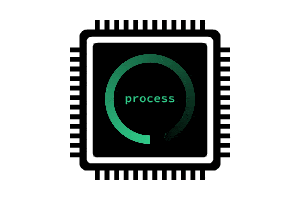

In [2]:
Image("1.1-m565.gif")

Today, most CPUs have several cores. This means that computers can now run several programs in parallel.

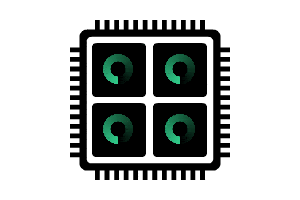

In [3]:
Image("1.2-m565.gif")

In this file we will learn the fundamentals of parallel processing. By the end of this file, we'll be able to do the following:

* start multiple processes
* run functions on several processes at the same time
* share data between multiple processes

To run several processes at the same time, we will be using the [`multiprocessing` module](https://docs.python.org/3/library/multiprocessing.html). Let's start by importing it.

**Task**

* Import the multiprocessing module.

**Answer**

In [4]:
import multiprocessing

We're going to learn how to create a process. One way to create a process is to use a [`multiprocessing.Process()` object](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Process). To create it, we provide the function that we want to execute in the `target` argument. Here's an example:

In [5]:
import time
def wait():
    time.sleep(0.5)
    print("Done waiting")

process = multiprocessing.Process(target=wait)

In the code above, we create a process that can run the `wait()` function. This function uses the [`time.sleep()` function](https://docs.python.org/3/library/time.html#time.sleep) to wait for half a second and then it prints the string `"Done waiting"`.

As we can see, nothing happened. The code didn't actually run the `wait()` function. It only created a process that can run the function. To run it, we need to use the [`Process.start()` method](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.start).

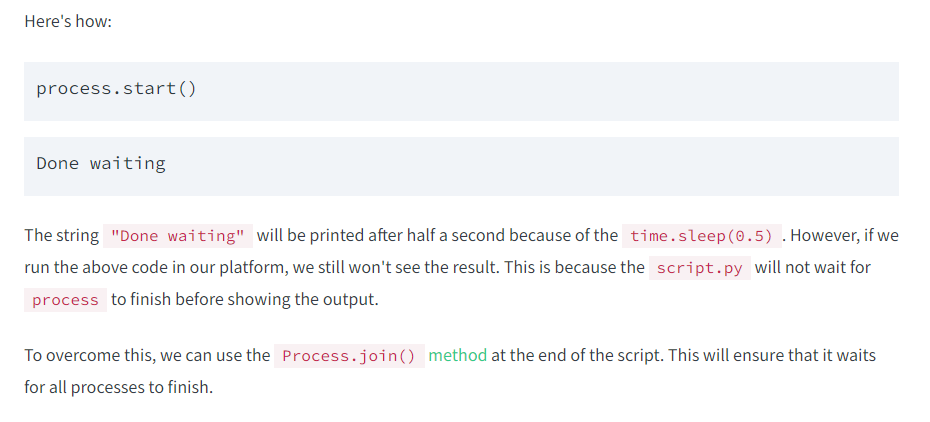

**Task**

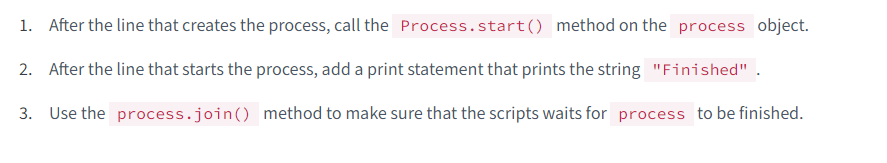

**Answer**

In [6]:
import time
def wait():
    time.sleep(0.5)
    print("Done waiting")

process = multiprocessing.Process(target=wait)

process.start()

print("Finished")

process.join()

Finished


Above we ran our first process! We got the following output:

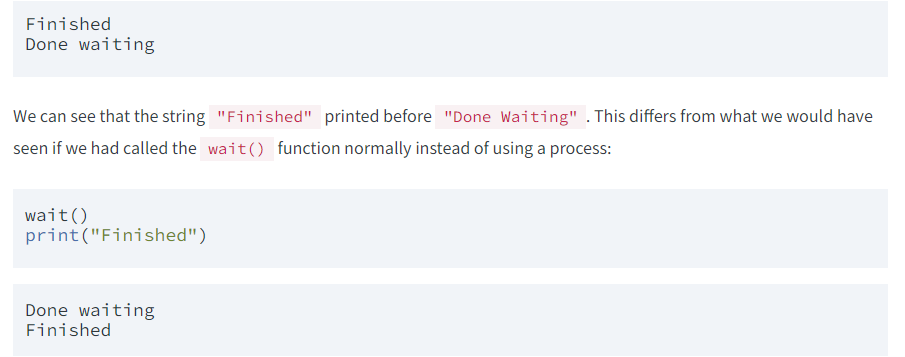

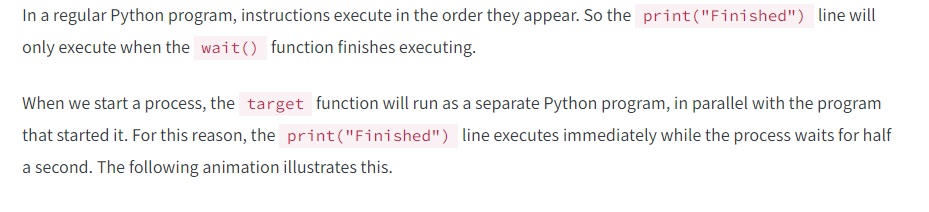

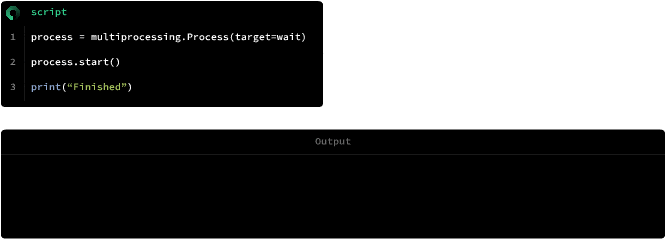

In [7]:
Image("3.1-m565.gif")

Depending on what we're doing, sometimes we want the program that started the other processes to wait for them to finish before continuing. We learned above that can do this by using the [Process.join() method](https://docs.python.org/3.8/library/multiprocessing.html?highlight=process%20join#multiprocessing.Process.join), like so:

`process.join()`

The script execution only goes past the line that called the join method once that process finishes executing.

Let's try joining the process after we start it but before we print `"Finished"`. By doing so, we will get the same result as if we called the `wait()` function directly.

**Task**

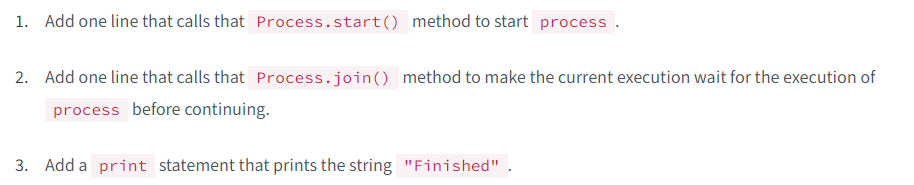

**Answer**

In [8]:
import time
def wait():
    time.sleep(0.5)
    print("Done waiting")

process = multiprocessing.Process(target=wait)

process.start()
process.join()
print("Finished")

Finished


Above, we learned that we can use the `Process.join()` method to force the current script to wait for the process to finish before continuing its execution. We can see that this was the case because this time the `"Done waiting"` string printed before the `"Finished"` string:

`Done waiting
 Finished`

Here's an animation showing what goes on in this case:

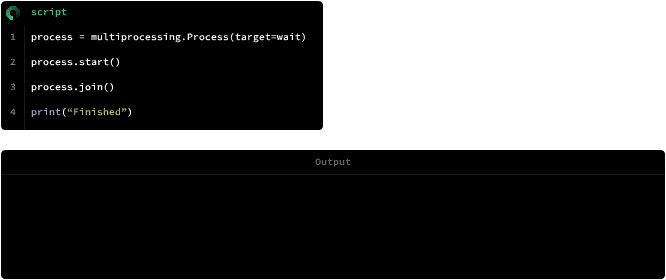

In [9]:
Image("4.1-m565.gif")

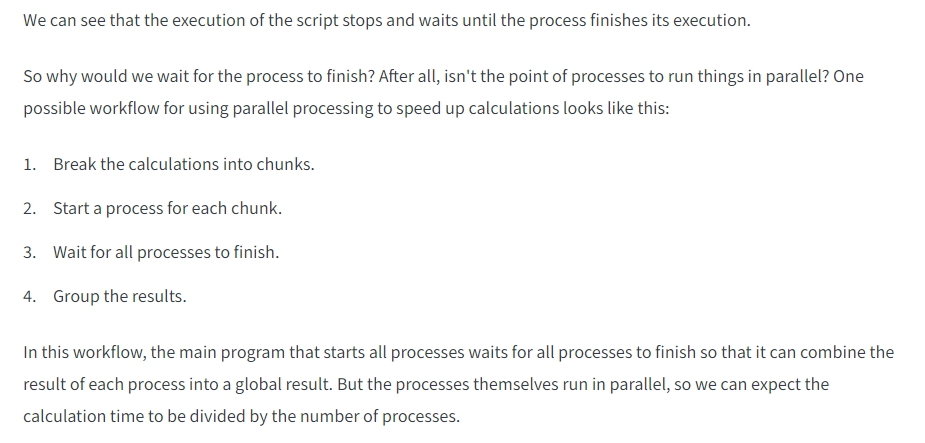

Let's run two processes with the wait function and measure how long the scripts take to terminate.

**Task**

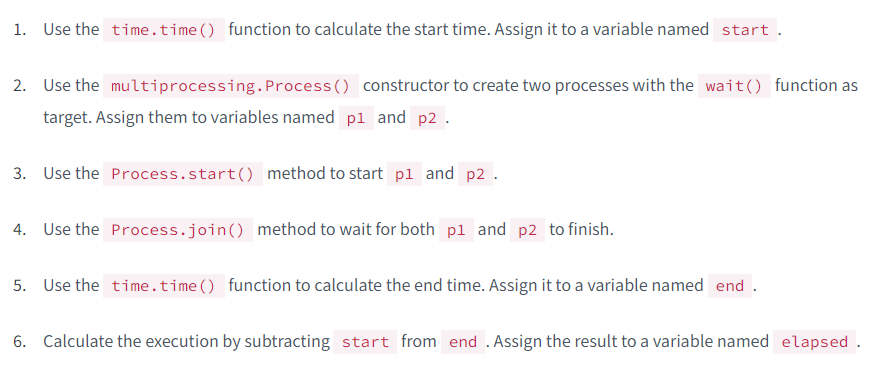

Before we move on, inspect the value of `elapsed` to see how long it took to run the two processes.

**Answer**

In [10]:
import time
def wait():
    time.sleep(0.5)
    print("Done waiting")

start = time.time()

p1 = multiprocessing.Process(target=wait)
p2 = multiprocessing.Process(target=wait)

p1.start()
p2.start()

p1.join()
p2.join()

end = time.time()

elapsed = end - start
elapsed

0.8536889553070068

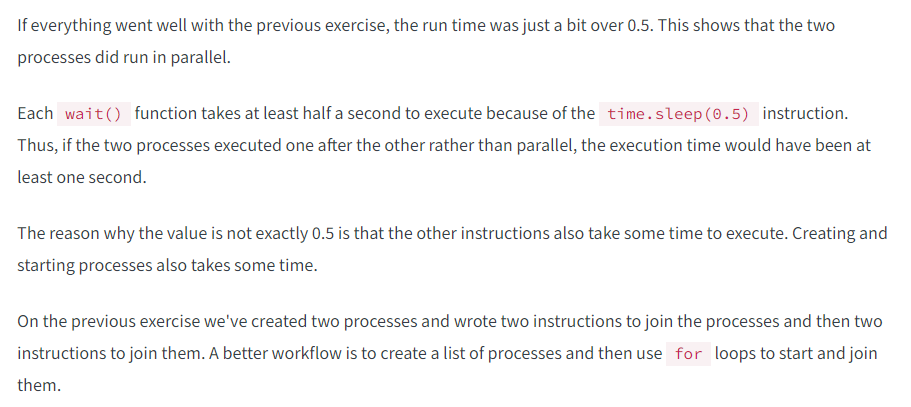

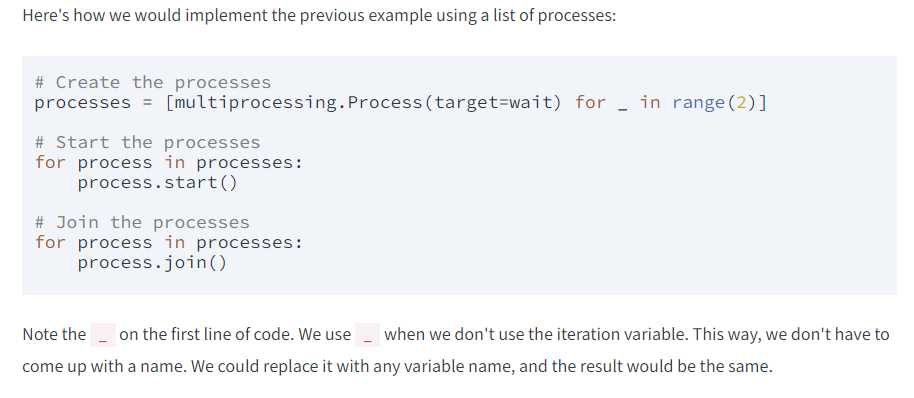

Let's practice this workflow by creating and running six processes with the wait() function. We'll also measure the execution time to see how long it takes to run these processes.

**Task**

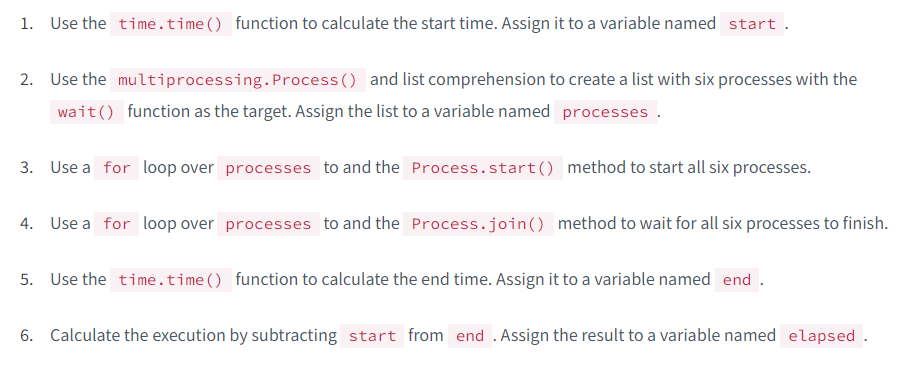

**Answer**

In [11]:
import time
def wait():
    time.sleep(0.5)
    print("Done waiting")

# Add code below
start = time.time()

processes = [multiprocessing.Process(target=wait) for _ in range(6)]

for process in processes:
    process.start()

for process in processes:
    process.join()

end = time.time()

elapsed = end - start
elapsed

0.6336917877197266

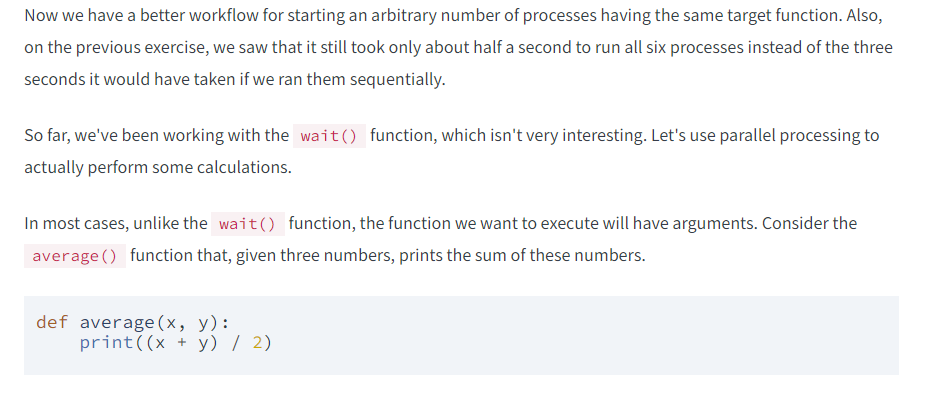

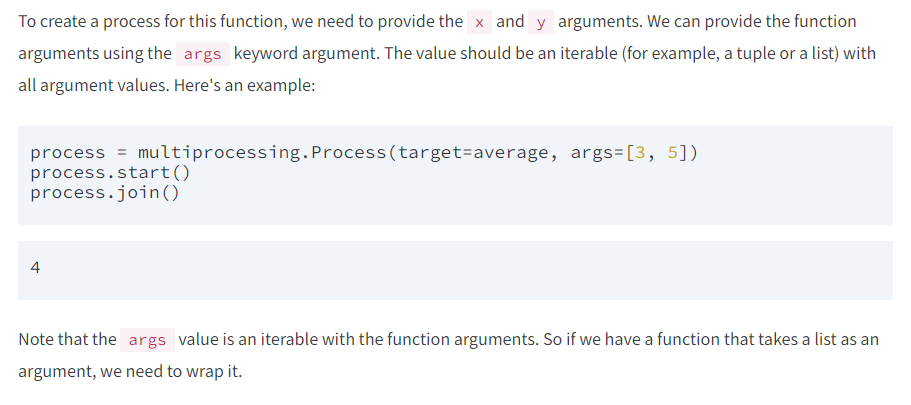

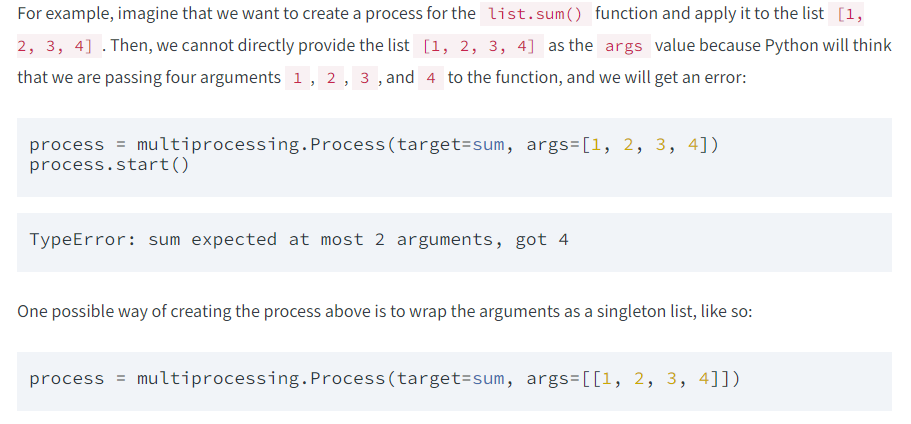

Let's practice creating and starting processes for functions with arguments.

In [12]:
def sum3(x, y, z):
    print(x + y + z)

def list_average(values):
    print(sum(values) / len(values))


**Task**

We are providedy with two functions. The `sum3()` function adds three values together and prints their sum. The `list_average()` function takes a list as input and prints the average value of that list.

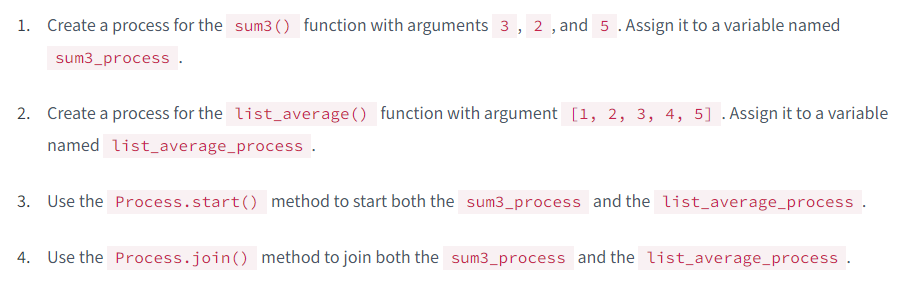

**Answer**

In [13]:
sum3_process = multiprocessing.Process(target=sum3, args=[3, 2, 5])
list_average_process = multiprocessing.Process(target=list_average, args=[[1, 2, 3, 4, 5]])

sum3_process.start()
list_average_process.start()

sum3_process.join()
list_average_process.join()

Great progress! We can now run functions with arguments on different processes. The functions from above didn't return any value. Instead, they printed the result to the screen.

Unfortunately, with our current way of creating and running processes, we can't get the return value of a function. The problem is that the function is running on a separate process. Each process has its own memory, which it doesn't share with other processes (not even the one that created it).

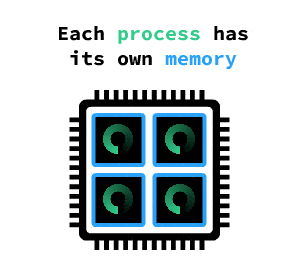

In [14]:
Image("7.1-m565.gif")

One way to get around this problem is to allocate shared memory. Then instead of returning the value, we can write the output value in that shared memory location and then read it.

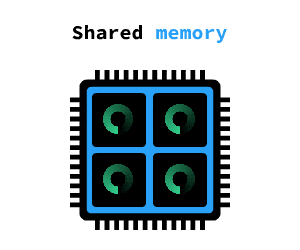

In [15]:
Image("7.2-m565.gif")

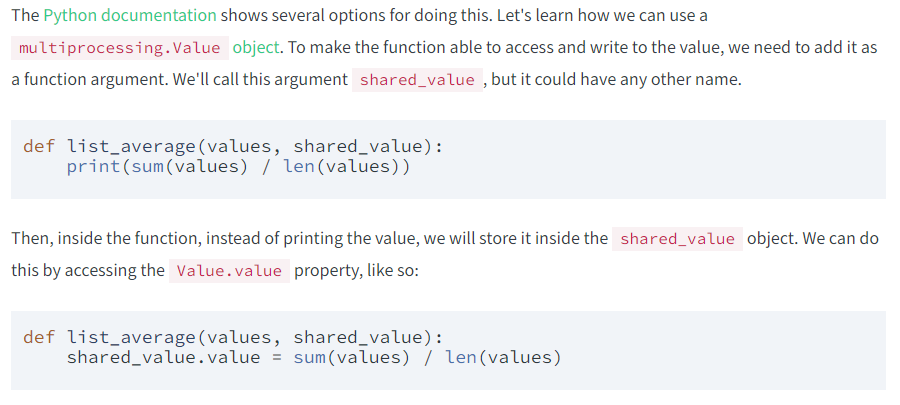

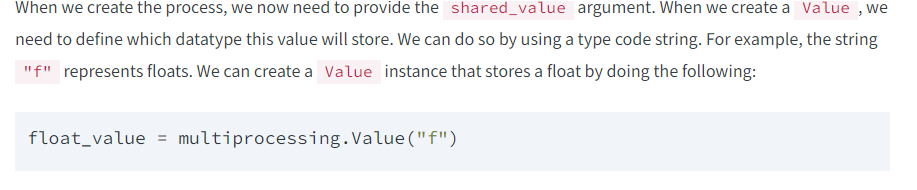

We can find the list of all codes in the [documentation](https://docs.python.org/3/library/array.html#module-array). Once we have created the value, we can create the process by adding `float_value` to the argument list:

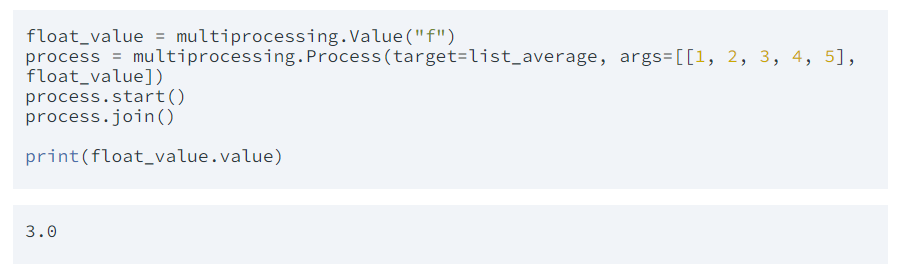

Let's transform the `sum3()` function so that it writes the result in a shared value rather than printing it to the screen.

**Task**

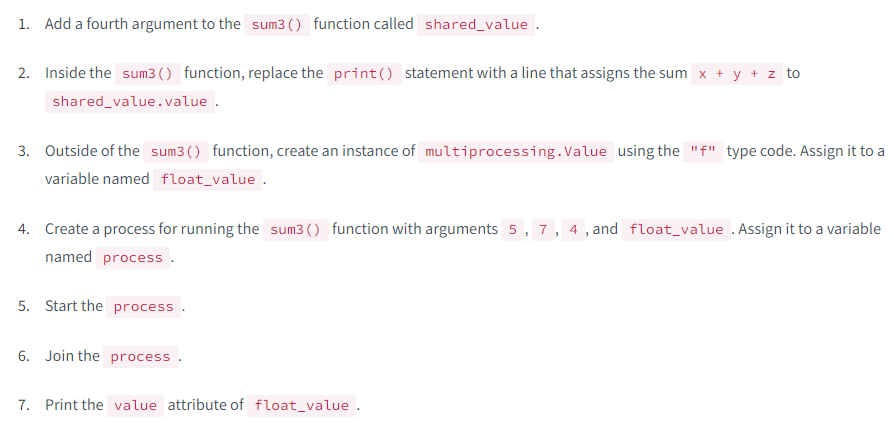

**Answer**

In [16]:
def sum3(x, y, z):
    print(x + y + z)
    
def sum3(x, y, z, shared_value):
    shared_value.value = x + y + z

float_value = multiprocessing.Value("f")

process = multiprocessing.Process(target=sum3, args=[5, 7, 4, float_value])

process.start()
process.join()

print(float_value.value)

0.0


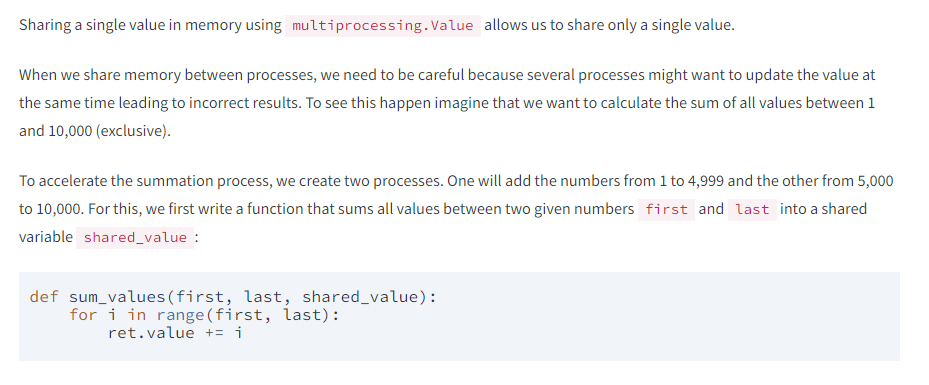

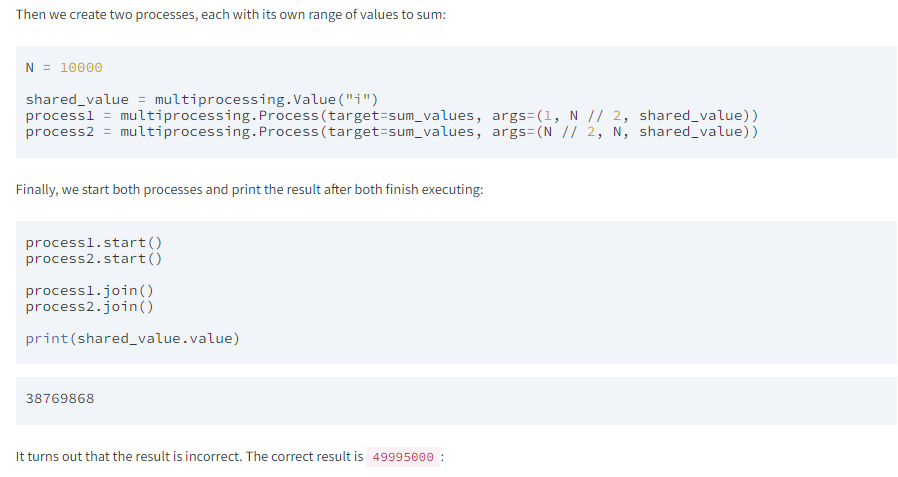

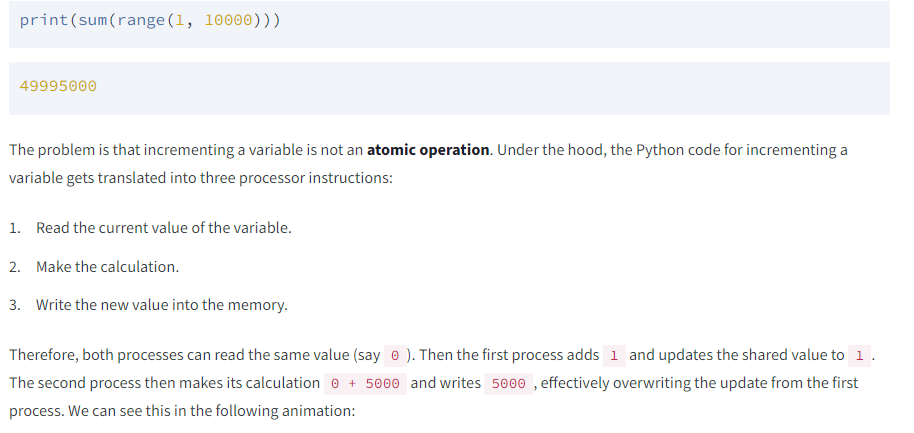

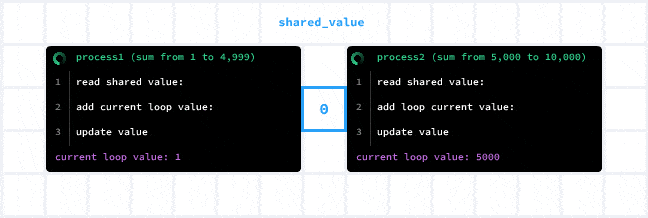

In [17]:
Image("8.1-m565.gif")

Let's experiment to convince ourselves that the result of the experiment above is unpredictable. We will execute the same code several times and collect all results in a list.

**Task**

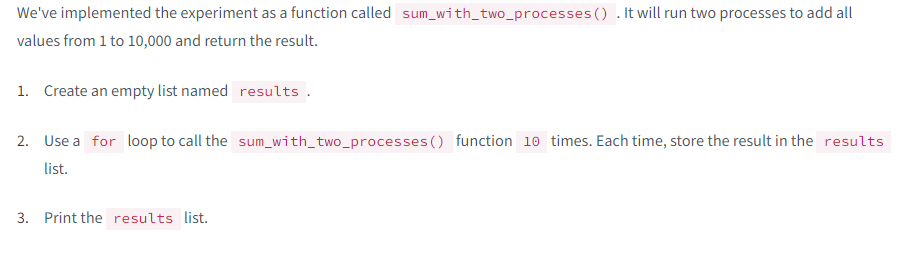

**Answer**

In [19]:
def sum_values(first, last, shared_value):
    for i in range(first, last):
        shared_value.value += i

def sum_with_two_processes():
    N = 10000

    shared_value = multiprocessing.Value("i")
    process1 = multiprocessing.Process(target=sum_values, args=(1, N // 2, shared_value))
    process2 = multiprocessing.Process(target=sum_values, args=(N // 2, N, shared_value))

    process1.start()
    process2.start()

    process1.join()
    process2.join()
    return shared_value.value


results = []
for _ in range(10):
    result = sum_with_two_processes()
    results.append(result)

results

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Above, we've learned that sharing memory between multiple processes can lead to problems. We can fix it by using a **lock**.

In parallel processing, a [lock](https://en.wikipedia.org/wiki/Lock_(computer_science)) is a mechanism that controls resource access between several processes. A process can acquire the lock to a resource, preventing all other processes to access it. Any process that tries to access that resource during that time will halt and wait until the lock releases.

We can imagine it as a store that only allows a single customer at a time. When a customer arrives, if the store is empty, the customer gets in. Otherwise, the customer will wait for their turn outside. Once the store becomes empty, one of the waiting customers is allowed in.

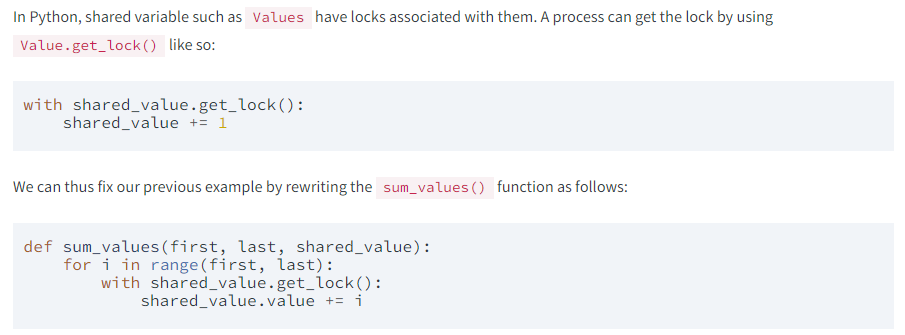

Using this will always yield the correct result. The problem, however, is that we are not really doing parallel processing anymore. The processes will mostly wait for each other to get the lock, as we can see in the following animation:

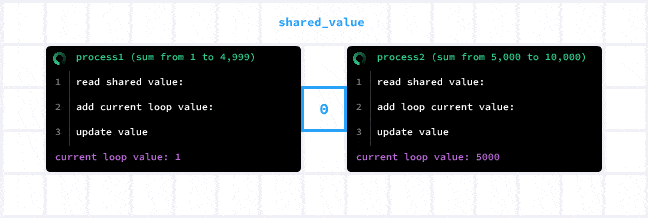

In [20]:
Image("9.1-m565.gif")

To fix this and ensure that calculations are parallel, we need to implement the function in a slightly different way. Inside the function, we declare a local variable. Then, instead of updating the shared variable in each loop iteration, we update the local variable. Only after the for loop, we add the value of the local variable to the shared variable. In this way, each process only needs to acquire the lock a single time!

In [21]:
def sum_values(first, last, shared_value):
    for i in range(first, last):
        with shared_value.get_lock():
            shared_value.value += i

def measure_runtime(function_to_measure):
    N = 10000
    shared_value = multiprocessing.Value("i")
    process1 = multiprocessing.Process(target=function_to_measure, args=(1, N // 2, shared_value))
    process2 = multiprocessing.Process(target=function_to_measure, args=(N // 2, N, shared_value))
    start = time.time()

**Task**

We've provided with the `sum_values()` function. We've also provided with a `measure_runtime()` that measures the time a given function take to add all values between 1 and 10,000. We will use it to compare the execution time of `sum_values()` and the improved version.

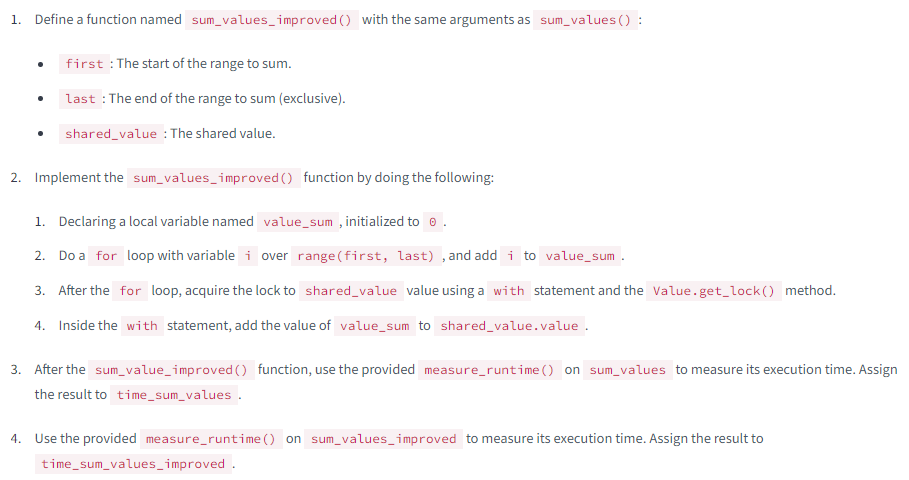

Inspect both execution times. The improved version should be about twice as fast.

**Answer**

In [23]:
def sum_values(first, last, shared_value):
    for i in range(first, last):
        with shared_value.get_lock():
            shared_value.value += i

def measure_runtime(function_to_measure):
    N = 10000
    shared_value = multiprocessing.Value("i")
    process1 = multiprocessing.Process(target=function_to_measure, args=(1, N // 2, shared_value))
    process2 = multiprocessing.Process(target=function_to_measure, args=(N // 2, N, shared_value))
    start = time.time()
    process1.start()
    process2.start()
    process1.join()
    process2.join()
    end = time.time()
    return end - start
    

def sum_values_improved(first, last, shared_value):
    value_sum = 0
    for i in range(first, last):
        value_sum += i
    with shared_value.get_lock():
        shared_value.value += value_sum

time_sum_values = measure_runtime(sum_values)
time_sum_values_improved = measure_runtime(sum_values_improved)

print(time_sum_values)
print(time_sum_values_improved)

0.6136822700500488
0.22922897338867188


We learned how to create and run functions in processes that are executed in parallel. We also learned how to provide arguments to those functions and how to share memory between the processes.

We learned that we can use shared memory as a workaround to retrieve the result of a function. However, this isn't very convenient. In the next file, we'll learn an easier way of running processes that yields the return values of the functions.